# 範例

In [1]:
#  Import Library
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


## 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

W0716 21:08:33.830475  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#卷積層1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))

W0716 21:08:34.030081  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 21:08:34.034056  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 21:08:34.058990  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 21:08:34.072953  7848 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and 

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0716 21:08:35.971656  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [10]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [14]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(10, activation='softmax'))

In [16]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [17]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型
請分別選用"categorical_crossentropy", "MSE", "binary_crossentropy"

查看Train/test accurancy and loss rate

In [23]:
model_categorical_crossentropy = model
model_MSE = model
model_binary_crossentropy = model

## categorical_crossentropy

In [19]:
model_categorical_crossentropy.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model_categorical_crossentropy.fit(x_img_train_normalize, y_label_train_OneHot,
                                                 validation_split=0.2,
                                                 epochs=10, batch_size=16, verbose=1)  

W0716 21:17:02.157335  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 21:17:02.184303  7848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0716 21:17:02.311139  7848 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 54s 1ms/step - loss: 1.8138 - acc: 0.3421 - val_loss: 1.6163 - val_acc: 0.4551
Epoch 2/10
40000/40000 [==============================] - 48s 1ms/step - loss: 1.4492 - acc: 0.4775 - val_loss: 1.3863 - val_acc: 0.5357
Epoch 3/10
40000/40000 [==============================] - 48s 1ms/step - loss: 1.2952 - acc: 0.5396 - val_loss: 1.3027 - val_acc: 0.5811
Epoch 4/10
40000/40000 [==============================] - 48s 1ms/step - loss: 1.1875 - acc: 0.5799 - val_loss: 1.2130 - val_acc: 0.6138
Epoch 5/10
40000/40000 [==============================] - 48s 1ms/step - loss: 1.1011 - acc: 0.6096 - val_loss: 1.1467 - val_acc: 0.6348
Epoch 6/10
40000/40000 [==============================] - 48s 1ms/step - loss: 1.0319 - acc: 0.6346 - val_loss: 1.1093 - val_acc: 0.6310
Epoch 7/10
40000/40000 [==============================] - 48s 1ms/step - loss: 0.9684 - acc: 0.6575 - val_loss: 1.0550 - val_acc

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

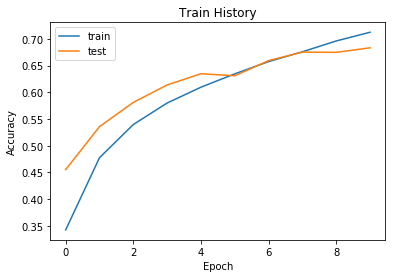

In [21]:
show_train_history('acc','val_acc')

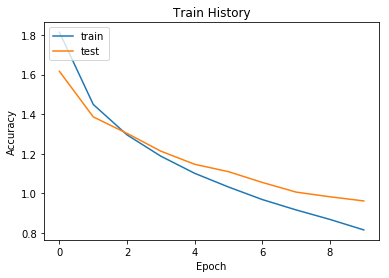

In [22]:
show_train_history('loss','val_loss')

## MSE

In [24]:
model_MSE.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history=model_MSE.fit(x_img_train_normalize, y_label_train_OneHot,
                            validation_split=0.2,
                            epochs=10, batch_size=16, verbose=1)  

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 50s 1ms/step - loss: 0.0350 - acc: 0.7483 - val_loss: 0.0420 - val_acc: 0.7075
Epoch 2/10
40000/40000 [==============================] - 51s 1ms/step - loss: 0.0342 - acc: 0.7562 - val_loss: 0.0417 - val_acc: 0.7072
Epoch 3/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.0339 - acc: 0.7568 - val_loss: 0.0414 - val_acc: 0.7117
Epoch 4/10
40000/40000 [==============================] - 49s 1ms/step - loss: 0.0335 - acc: 0.7626 - val_loss: 0.0411 - val_acc: 0.7124
Epoch 5/10
40000/40000 [==============================] - 48s 1ms/step - loss: 0.0331 - acc: 0.7644 - val_loss: 0.0408 - val_acc: 0.7160
Epoch 6/10
40000/40000 [==============================] - 54s 1ms/step - loss: 0.0328 - acc: 0.7637 - val_loss: 0.0408 - val_acc: 0.7149
Epoch 7/10
40000/40000 [==============================] - 52s 1ms/step - loss: 0.0325 - acc: 0.7675 - val_loss: 0.0406 - val_acc

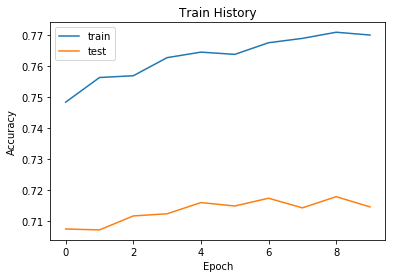

In [25]:
show_train_history('acc','val_acc')

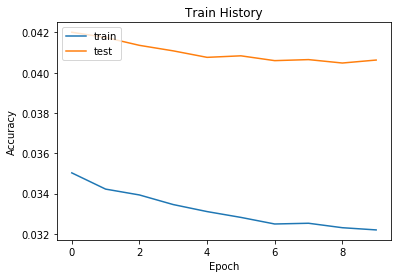

In [26]:
show_train_history('loss','val_loss')

## binary _crossentropy

In [27]:
model_binary_crossentropy.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model_binary_crossentropy.fit(x_img_train_normalize, y_label_train_OneHot,
                                            validation_split=0.2,
                                            epochs=10, batch_size=16, verbose=1)  

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.1105 - acc: 0.9569 - val_loss: 0.1386 - val_acc: 0.9466
Epoch 2/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1099 - acc: 0.9571 - val_loss: 0.1377 - val_acc: 0.9470
Epoch 3/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1082 - acc: 0.9579 - val_loss: 0.1391 - val_acc: 0.9465
Epoch 4/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1070 - acc: 0.9581 - val_loss: 0.1368 - val_acc: 0.9475
Epoch 5/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1058 - acc: 0.9587 - val_loss: 0.1356 - val_acc: 0.9478
Epoch 6/10
40000/40000 [==============================] - 55s 1ms/step - loss: 0.1039 - acc: 0.9597 - val_loss: 0.1354 - val_acc: 0.9478
Epoch 7/10
40000/40000 [==============================] - 56s 1ms/step - loss: 0.1026 - acc: 0.9602 - val_loss: 0.1342 - val_acc

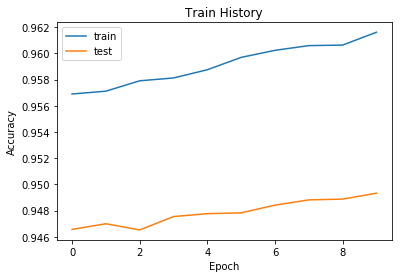

In [28]:
show_train_history('acc','val_acc')

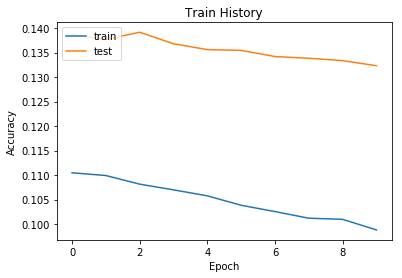

In [29]:
show_train_history('loss','val_loss')